In [1]:
data(longley)
longley
dm<-dim(longley)
dat<-head(longley)
str<-c(names(longley))
len<-length(str)
y<-longley$GNP.deflator
# Seeing the data we that we Basically We want to predict GNP deflator 
#given a sample of 16
# between years 1945-1960
# so the main charachteristic of the dataset for our estimation
# is GNP_deflator

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221
1952,98.1,346.999,193.2,359.4,113.270,1952,63.639
1953,99.0,365.385,187.0,354.7,115.094,1953,64.989
1954,100.0,363.112,357.8,335.0,116.219,1954,63.761
1955,101.2,397.469,290.4,304.8,117.388,1955,66.019
1956,104.6,419.180,282.2,285.7,118.734,1956,67.857


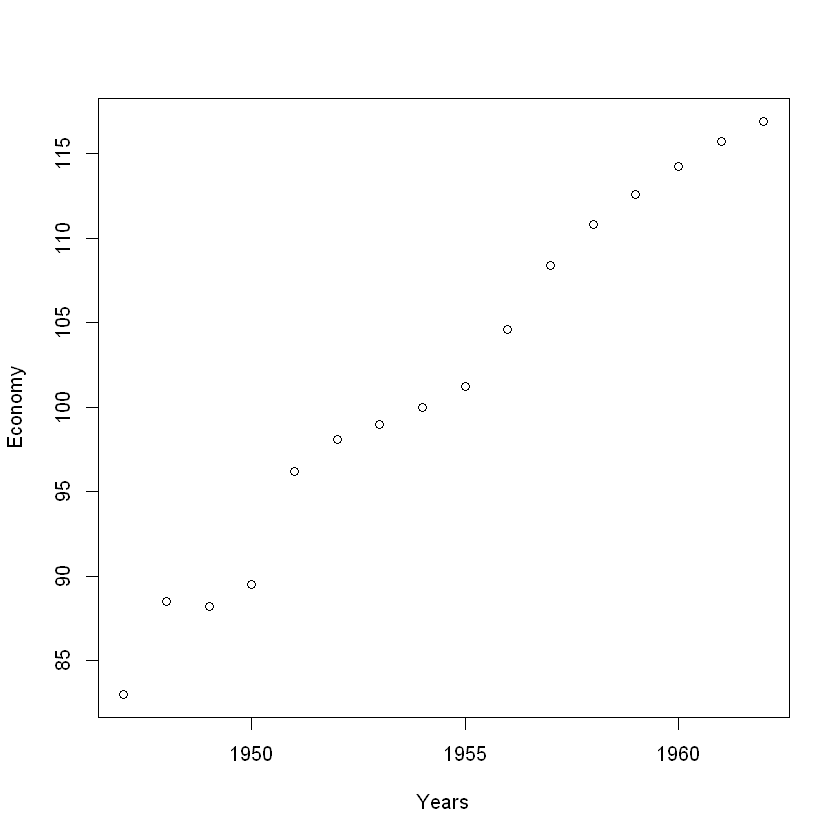

In [2]:
plot(longley$Year,longley$GNP.deflator,xlab="Years",ylab = "Economy")
# plotting the origin GNP_deflator of Longley's economy
#between years 1945-1960


In [3]:
df<-longley
df$Year<-NULL
# Year is a metric for our results but as a feature it doesn't affect
# the changes on the Longley's economy, so we remove that column
# from the dataset 

df<-df[,2:6]
df

,GNP,Unemployed,Armed.Forces,Population,Employed
1947,234.289,235.6,159.0,107.608,60.323
1948,259.426,232.5,145.6,108.632,61.122
1949,258.054,368.2,161.6,109.773,60.171
1950,284.599,335.1,165.0,110.929,61.187
1951,328.975,209.9,309.9,112.075,63.221
1952,346.999,193.2,359.4,113.270,63.639
1953,365.385,187.0,354.7,115.094,64.989
1954,363.112,357.8,335.0,116.219,63.761
1955,397.469,290.4,304.8,117.388,66.019
1956,419.180,282.2,285.7,118.734,67.857


In [4]:
#This is our main features
########################################
GNP<-df[,1]
Un<-df[,2]
AF<-df[,3]
pop<-df[,4]
emp<-df[,5]
######################################

#Let's proceed with our fitting
fit<-lm(y~ GNP+Un+AF+pop+emp,data=df)
sum<-summary(fit)$coef
sum

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),225.800117333,81.873096320,2.7579282,0.020201498
GNP,0.221304646,0.060903222,3.6337100,0.004584302
Un,0.022500676,0.008190062,2.7473146,0.020572846
AF,0.004825249,0.007800131,0.6186113,0.550002911
pop,-1.707504127,0.644746706,-2.6483332,0.024382714
emp,-0.273425430,0.746136746,-0.3664549,0.721660219


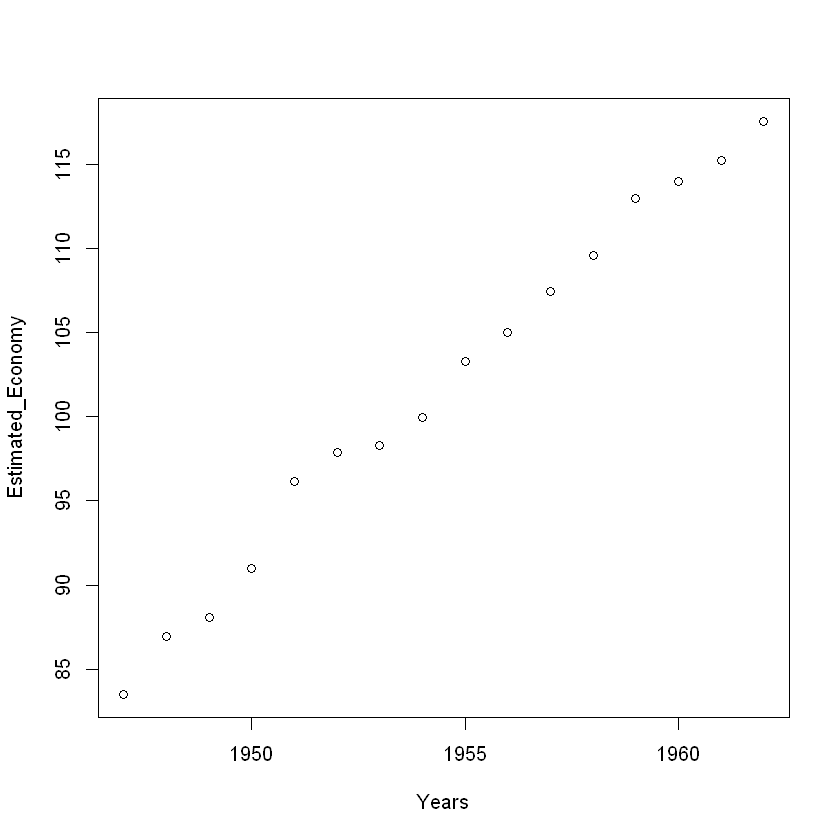

In [5]:
# Store the coefficients of the features plus the intercept
# for  the visualization our data estimation
#############################
GNP_coef<-sum[2,1]
Un_coef<-sum[3,1]
AF_coef<-sum[4,1]
pop_coef<-sum[5,1]
emp_coef<-sum[6,1]
b<-sum[1,1]

Est<- GNP*GNP_coef + Un*Un_coef + AF*AF_coef + pop*pop_coef + emp*emp_coef + b
plot(longley$Year,Est,xlab="Years",ylab = "Estimated_Economy")
#############################

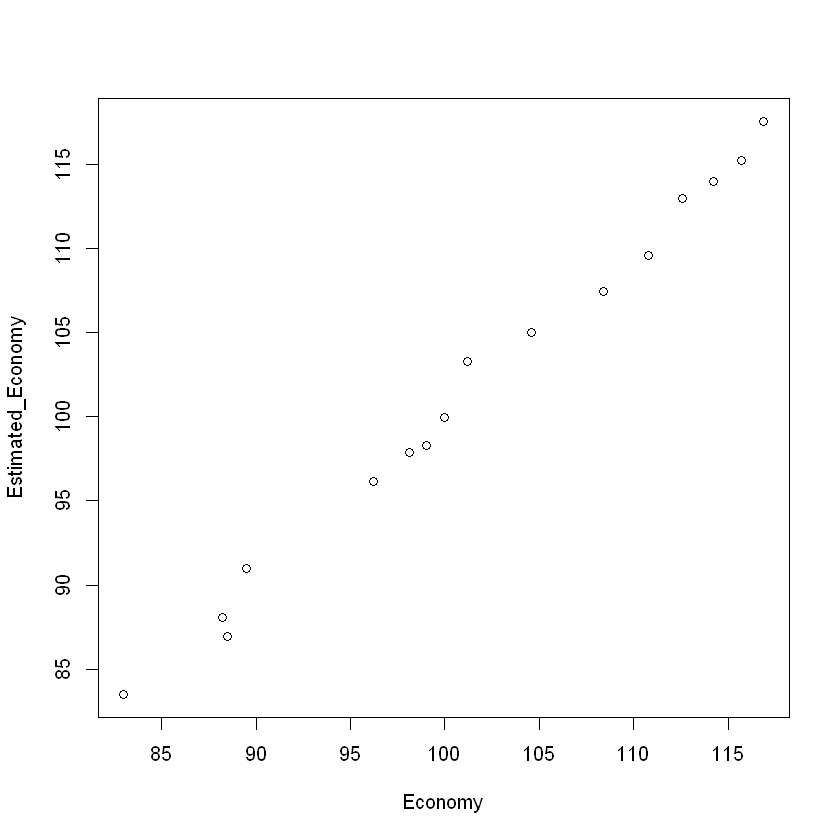

In [6]:
# Now let's compare our origin results with our estimated results
plot(longley$GNP.deflator,Est,xlab="Economy",ylab = "Estimated_Economy")

# From the plot our intuition says that for generally we  have a 
#good fit but let's examine further the adjusted R squared
#(adjusted because we have multiple features so we are talking 
#about multiple linear regression) says

In [7]:
sm<-summary(fit)
adj_R<-sm$adj.r.squared
adj_R<-adj_R*100
print("the percentage of our adjusted R squared of the model is :")
print(adj_R) 
# We see that we have 98.86% , that's a good fit!!!
#but it is better to examine if we can develop a more prefferable model


[1] "the percentage of our adjusted R squared of the model is :"
[1] 98.86866


In [8]:
# In our dataframe we have 5 features considering 
# the changes of Longley's economy
# Some features may have a great impact on these changes
# some maybe not
#It's for the best to ignore the features which doesn't have significant
# effect on Longley's economy
# Let's proceed with stepwise multilinear regression
#In this project we are working with only 5 features only
# but in real-life big data we have a lot of features
#describing a dataset e.g. we may have >1000 features to examine
# so that's why stepwise regression is crucial


#Before developing the stepwise model,let's see the correlation between 
#our features



library(fpp)
## put histograms on the diagonal
panel.hist <- function(x, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(usr[1:2], 0, 1.5) )
  h <- hist(x, plot = FALSE)
  breaks <- h$breaks; nB <- length(breaks)
  y <- h$counts; y <- y/max(y)
  rect(breaks[-nB], 0, breaks[-1], y, col = "cyan", ...)
}

pairs(df, diag.panel=panel.hist)


# In some features we see a correlation between them(intuitevely)
#e.g. between Population-GNP,seeing that as population increasing so as GNP does
# but other relations have a large variance giving the essence of indepedency 
#e.g. Armed Forces-Unemployment

Warning message:
"package 'fpp' was built under R version 3.4.3"Loading required package: forecast
Warning message:
"package 'forecast' was built under R version 3.4.3"Error: package or namespace load failed for 'forecast' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 there is no package called 'lattice'


ERROR: Error: package 'forecast' could not be loaded


In [9]:
fit1<-step(lm(y~ GNP+Un+AF+pop+emp,data=df))
sum1<-summary(fit1)$coef
# we see that the stepwise model chose 3 features out of 5:
# GNP,Unemployment,Population
sum1

Start:  AIC=8.89
y ~ GNP + Un + AF + pop + emp

       Df Sum of Sq    RSS     AIC
- emp   1    0.1769 13.352  7.1055
- AF    1    0.5042 13.680  7.4930
<none>              13.175  8.8921
- pop   1    9.2407 22.416 15.3950
- Un    1    9.9444 23.120 15.8895
- GNP   1   17.3965 30.572 20.3598

Step:  AIC=7.11
y ~ GNP + Un + AF + pop

       Df Sum of Sq    RSS     AIC
- AF    1     1.323 14.675  6.6169
<none>              13.352  7.1055
- pop   1     9.673 23.025 13.8237
- Un    1    14.490 27.842 16.8633
- GNP   1    35.211 48.563 25.7645

Step:  AIC=6.62
y ~ GNP + Un + pop

       Df Sum of Sq    RSS     AIC
<none>              14.675  6.6169
- Un    1    13.317 27.992 14.9493
- pop   1    13.320 27.995 14.9510
- GNP   1    48.561 63.236 27.9887


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),221.12959101,48.972506360,4.515382,7.074611e-04
GNP,0.22009805,0.034927699,6.301533,3.938664e-05
Un,0.02245816,0.006805676,3.299916,6.341740e-03
pop,-1.80501094,0.546924523,-3.300293,6.337315e-03


In [10]:
#################
GNP1_coef<-sum1[2,1]
Un1_coef<-sum1[3,1]
pop1_coef<-sum1[4,1]
b1<-sum1[1,1]
##################




new_Est<- GNP1_coef*GNP + Un1_coef*Un +pop1_coef*pop + b1
sm<-summary(fit1)
adj_R1<-sm$adj.r.squared
adj_R1<-adj_R1*100


print(" Adjusted R squared in Linear Multiregression Model :")
print(adj_R)
print(" Adjusted R squared in Stepwise Linear Multiregression Model :")
print(adj_R1)
# we see that adjusted R in stepwise model is  a little bit greater (98.95>98.87)
# Comparing Plots of origin and the new estimation of the stepwise model 

[1] " Adjusted R squared in Linear Multiregression Model :"
[1] 98.86866
[1] " Adjusted R squared in Stepwise Linear Multiregression Model :"
[1] 98.9499


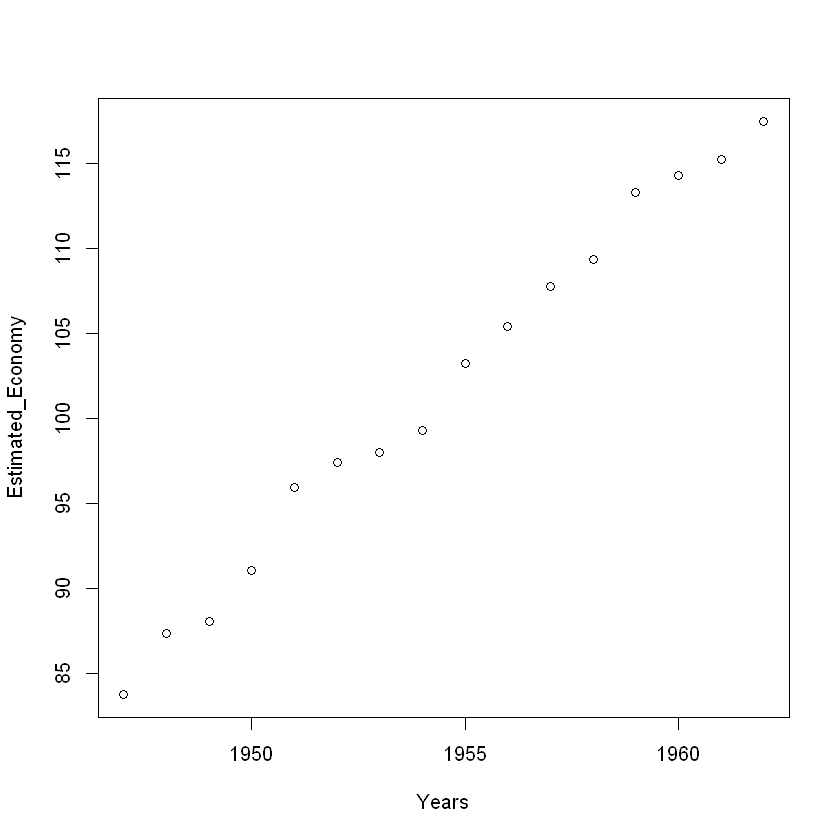

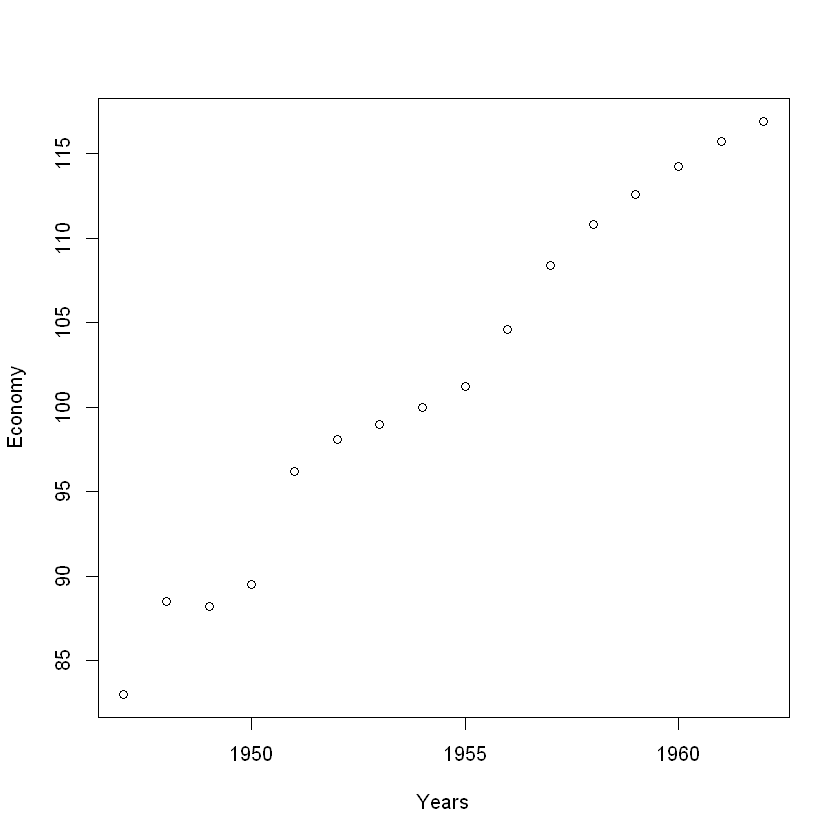

In [11]:
plot(longley$Year,new_Est,xlab="Years",ylab = "Estimated_Economy")
plot(longley$Year,longley$GNP.deflator,xlab="Years",ylab = "Economy")

In [12]:
# comparing the two models
anova(fit1,fit)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
12,14.67504,NA,NA,NA,NA
10,13.17532,2,1.499719,0.5691395,0.5833236


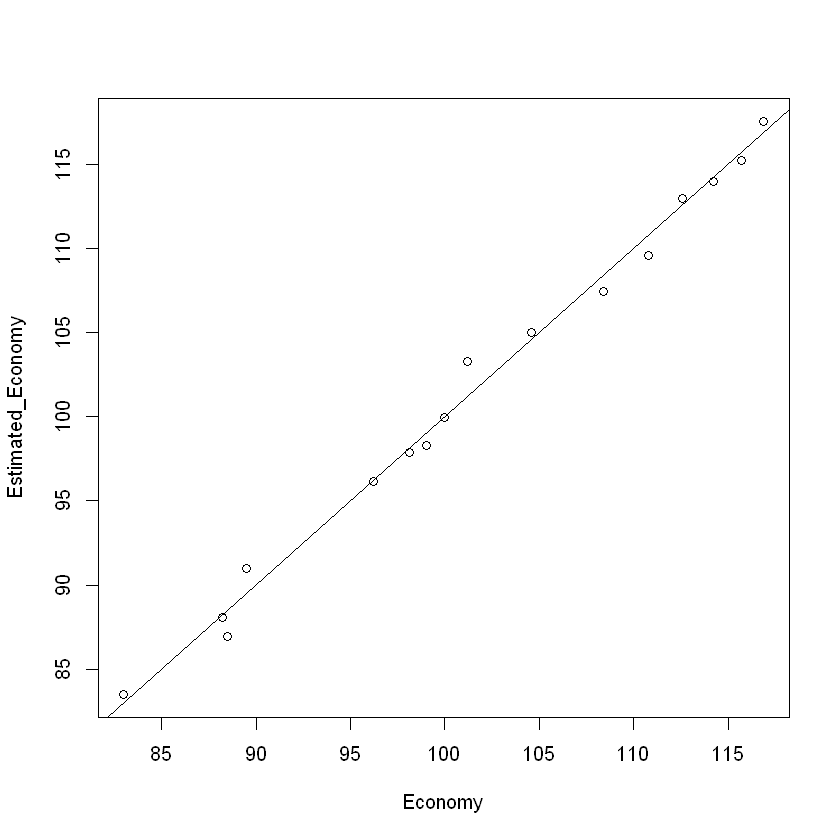

In [13]:
plot(longley$GNP.deflator, fitted(fit),xlab="Economy",ylab = "Estimated_Economy") 
abline(0,1)

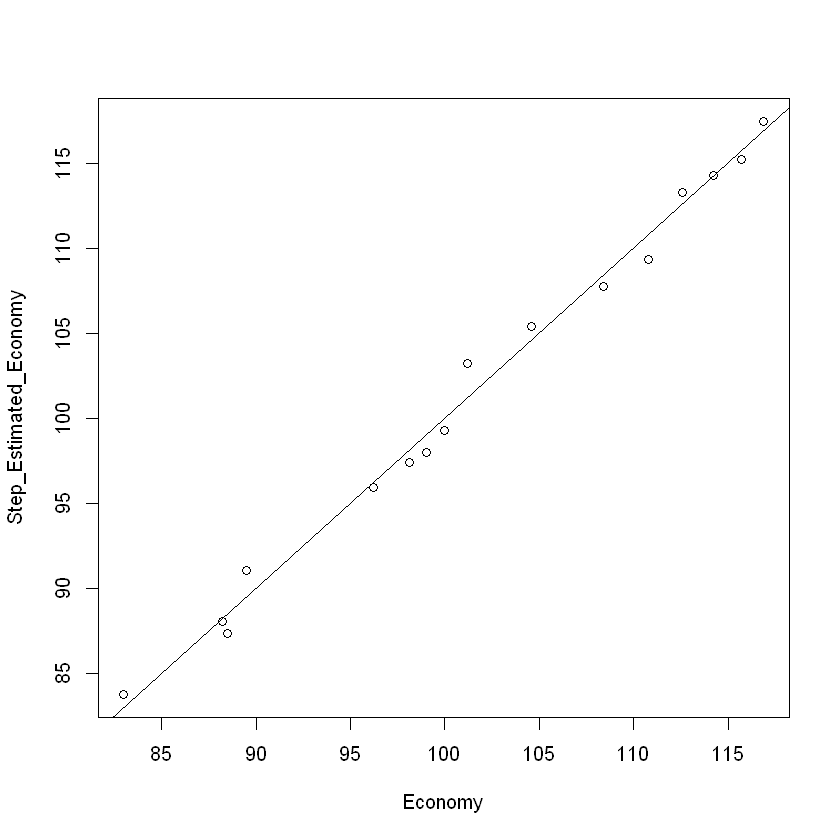

In [14]:
plot(longley$GNP.deflator, fitted(fit1),xlab="Economy",ylab = "Step_Estimated_Economy") 
abline(0,1) 

In [15]:
# That means that in stepwise linear we have better score(better fit)
#(bigger adjustive r_squared) but in linear regression we maybe have a worse fit
# but as we can see we can have better predictions
#probably because of lack of features in stepwise in our problem
# as we don't speak about large data and we have a small number of features
# so we may need them all

# The problem of having a good fit but having worst predictions is
#a problem of overfitting

# Every problem's approoch is different due to its charachteristics
# so its up to data scientist's intuition to examine the problem
# and then use the most appropriate method for the analysis
